In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext rpy2.ipython

In [3]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty.csv")

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (2,4,5,8,11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.head()

,Unnamed: 0,id_szkoly,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
0,1934741,24583,k,1993,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1936766,26476,k,1994,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,10,NaN,NaN,NaN,NaN
2,2353129,24097,k,1995,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,4,NaN,NaN,NaN,NaN
3,1475517,24097,k,1993,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22,NaN,NaN,6,NaN,NaN,NaN,NaN
4,1476163,26480,k,1993,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(len(df))
brakplci = df[pd.isnull(df.plec)]
print(len(brakplci))

352538
44951


In [6]:
brakplci.head()

,Unnamed: 0,id_szkoly,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
6898,17268508,26142,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42,NaN,NaN,23,NaN,NaN,NaN,NaN
40721,17284656,73364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38,NaN,NaN,17,NaN,NaN,NaN,NaN
40826,17268012,27074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43,NaN,NaN,28,8,NaN,NaN,NaN
40854,17268013,73412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,8,NaN,NaN,NaN,NaN
41215,17268039,73318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29,NaN,NaN,4,NaN,NaN,NaN,NaN


In [7]:
# cos nie tak z brakujacymi plcami
brakplci.count().iloc[:5]
# wydaje sie, ze tez brakuje innych metadanych, zatem pewnie nie piszacy z polskiego - right

Unnamed: 0    44951
id_szkoly        69
plec              0
rocznik           0
dysleksja         1
dtype: int64

In [8]:
df = df[pd.notnull(df.plec)]

In [9]:
for col in df.columns:
    if col.endswith("_laureat"):
        df[col] = df[col].fillna(False)

In [10]:
srednia = df.mean()

In [11]:
srednia

Unnamed: 0                 3142339.907275
id_szkoly                    26970.326795
rocznik                       1993.411346
biologia_laureat                 0.000273
biologia_podstawowa             17.496670
biologia_rozszerzona            32.067679
chemia_laureat                   0.000241
chemia_podstawowa               22.997605
chemia_rozszerzona              30.179973
fizyka_laureat                   0.000146
fizyka_podstawowa               18.166875
fizyka_rozszerzona              28.630877
geografia_laureat                0.000224
geografia_podstawowa            22.710267
geografia_rozszerzona           31.582375
historia_laureat                 0.000341
historia_podstawowa             46.961825
historia_rozszerzona            27.270116
informatyka_laureat              0.000198
informatyka_podstawowa          20.286339
informatyka_rozszerzona         26.087248
j_angielski_laureat              0.000120
j_angielski_podstawowa          34.457359
j_angielski_rozszerzona         32

In [23]:
maksima = df.max()

In [12]:
df[df.biologia_laureat==True].mean()

Unnamed: 0                 2528039.833333
id_szkoly                    23684.452381
rocznik                       1990.095238
biologia_laureat                 1.000000
biologia_podstawowa                   NaN
biologia_rozszerzona            60.000000
chemia_laureat                   0.035714
chemia_podstawowa                     NaN
chemia_rozszerzona              50.119048
fizyka_laureat                   0.011905
fizyka_podstawowa               41.500000
fizyka_rozszerzona              46.000000
geografia_laureat                0.011905
geografia_podstawowa                  NaN
geografia_rozszerzona           60.000000
historia_laureat                 0.000000
historia_podstawowa                   NaN
historia_rozszerzona                  NaN
informatyka_laureat              0.000000
informatyka_podstawowa                NaN
informatyka_rozszerzona               NaN
j_angielski_laureat              0.000000
j_angielski_podstawowa          48.618421
j_angielski_rozszerzona         44

In [13]:
df[df.biologia_laureat==True].count()

Unnamed: 0                 84
id_szkoly                  84
plec                       84
rocznik                    84
dysleksja                  84
biologia_laureat           84
biologia_podstawowa         0
biologia_rozszerzona       84
chemia_laureat             84
chemia_podstawowa           0
chemia_rozszerzona         84
fizyka_laureat             84
fizyka_podstawowa           2
fizyka_rozszerzona          7
geografia_laureat          84
geografia_podstawowa        0
geografia_rozszerzona       1
historia_laureat           84
historia_podstawowa         0
historia_rozszerzona        0
informatyka_laureat        84
informatyka_podstawowa      0
informatyka_rozszerzona     0
j_angielski_laureat        84
j_angielski_podstawowa     76
j_angielski_rozszerzona    48
j_polski_laureat           84
j_polski_podstawowa        84
j_polski_rozszerzona        2
matematyka_laureat         84
matematyka_podstawowa      84
matematyka_rozszerzona     14
WOS_laureat                84
WOS_podsta

In [24]:
kolumny_laureatow = [col for col in df.columns if col.endswith("_laureat")]
kolumny_przedmiotow = [col for col in df.columns if col.endswith("_podstawowa") or col.endswith("_rozszerzona")]

In [50]:
srednie_laureatow = pd.DataFrame([df[df[col]==True].mean() for col in kolumny_laureatow],
                                 index=kolumny_laureatow)

In [16]:
zlicenia_laureatow = pd.DataFrame([(df[df[col]==True] > 0).sum() for col in kolumny_laureatow],
                                 index=kolumny_laureatow)

In [47]:
# srednie_laureatow.loc['srednia'] = srednia 
# srednie_laureatow.loc['srednia', 'liczba'] = len(df)

In [27]:
srednie_laureatow[kolumny_przedmiotow]

,biologia_podstawowa,biologia_rozszerzona,chemia_podstawowa,chemia_rozszerzona,fizyka_podstawowa,fizyka_rozszerzona,geografia_podstawowa,geografia_rozszerzona,historia_podstawowa,historia_rozszerzona,informatyka_podstawowa,informatyka_rozszerzona,j_angielski_podstawowa,j_angielski_rozszerzona,j_polski_podstawowa,j_polski_rozszerzona,matematyka_podstawowa,matematyka_rozszerzona,WOS_podstawowa,WOS_rozszerzona
biologia_laureat,NaN,60.000000,NaN,50.119048,41.500000,46.000000,NaN,60.000000,NaN,NaN,NaN,NaN,48.618421,44.572917,52.904762,34.500000,44.702381,30.571429,NaN,NaN
chemia_laureat,NaN,50.000000,NaN,60.000000,NaN,48.148148,NaN,NaN,80.000000,NaN,NaN,NaN,48.253425,42.141509,51.513514,23.000000,46.878378,38.444444,NaN,NaN
fizyka_laureat,NaN,54.500000,NaN,53.333333,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,41.600000,47.875000,44.671875,46.800000,44.000000,48.644444,44.222222,NaN,NaN
geografia_laureat,29.000000,48.800000,30.000000,42.142857,25.500000,40.000000,NaN,60.000000,NaN,44.000000,NaN,NaN,48.358209,41.918367,52.753623,37.555556,44.217391,34.215686,NaN,38.500000
historia_laureat,NaN,47.000000,NaN,45.000000,12.000000,28.000000,42.000000,49.750000,NaN,50.000000,14.000000,NaN,47.209184,40.912162,55.676190,32.984615,37.190476,29.277778,NaN,37.819672
informatyka_laureat,NaN,NaN,NaN,NaN,NaN,45.357143,NaN,37.000000,NaN,NaN,NaN,50.000000,47.926230,43.444444,44.016393,32.000000,47.932203,42.200000,NaN,NaN
j_angielski_laureat,NaN,48.750000,NaN,51.222222,NaN,48.166667,NaN,52.000000,NaN,42.666667,NaN,29.500000,50.000000,49.515152,54.648649,33.812500,44.135135,40.050000,NaN,34.600000
j_polski_laureat,32.333333,45.071429,NaN,39.538462,36.000000,37.571429,NaN,46.277778,76.000000,38.357143,NaN,NaN,48.574534,41.857616,74.000000,44.000000,38.423077,29.269231,NaN,34.106061
matematyka_laureat,NaN,50.000000,NaN,50.666667,NaN,49.500000,NaN,46.000000,NaN,NaN,NaN,45.970588,48.808219,44.376923,48.459459,34.000000,50.000000,50.000000,NaN,37.000000
WOS_laureat,NaN,NaN,NaN,47.000000,NaN,44.666667,NaN,49.444444,87.000000,42.208333,NaN,NaN,46.975000,41.803030,53.675000,32.473684,40.375000,36.461538,NaN,50.000000


In [51]:
srednie_laureatow_proc = 100*srednie_laureatow[kolumny_przedmiotow]/maksima[kolumny_przedmiotow]

In [53]:
srednie_laureatow_proc['liczba'] = zlicenia_laureatow['id_szkoly']


In [19]:
zlicenia_laureatow

,Unnamed: 0,id_szkoly,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
biologia_laureat,84,84,84,84,84,84,0,84,3,0,...,48,0,84,2,0,84,14,0,0,0
chemia_laureat,74,74,74,74,74,3,0,39,74,0,...,53,0,74,1,1,74,45,0,0,0
fizyka_laureat,45,45,45,45,45,1,0,2,3,0,...,32,1,45,1,9,45,45,0,0,0
geografia_laureat,69,69,69,69,69,1,1,5,0,2,...,49,3,69,9,0,69,51,0,0,6
historia_laureat,105,105,105,105,105,0,0,1,0,0,...,74,10,105,65,0,105,18,6,0,61
informatyka_laureat,61,61,61,61,61,0,0,0,0,0,...,54,0,61,1,22,59,60,0,0,0
j_angielski_laureat,37,37,37,37,37,0,0,8,2,0,...,33,2,37,16,0,37,20,0,0,5
j_polski_laureat,183,183,183,183,183,0,3,14,0,0,...,151,183,183,183,1,182,26,1,0,66
matematyka_laureat,74,74,74,74,74,0,0,3,1,0,...,65,1,74,2,74,67,74,0,0,1
WOS_laureat,40,40,40,40,40,0,0,0,0,0,...,33,1,40,19,0,40,13,40,0,40


In [13]:
# z dysleksja jest problem jako True, False i nan

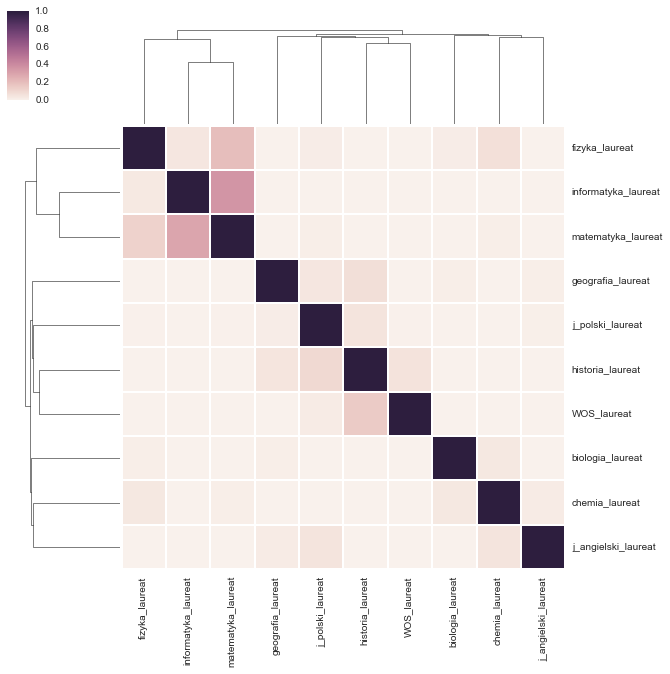

In [14]:
# heatmapy z warunkowych olimpiad
sns.clustermap(srednie_laureatow.loc[:, kolumny_laureatow]);

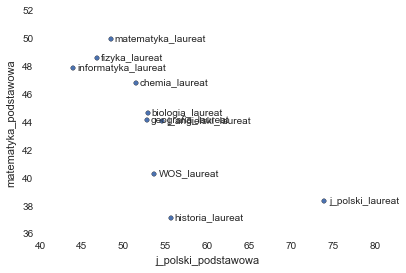

In [27]:
srednie_laureatow.plot(x='j_polski_podstawowa', y='matematyka_podstawowa', kind='scatter')
for k, v in srednie_laureatow.iterrows():
    plt.text(v['j_polski_podstawowa'] + 0.5, v['matematyka_podstawowa'] - 0.2, k)

In [58]:
srednie_laureatow_proc = srednie_laureatow_proc.applymap(float)


In [62]:
srednie_laureatow_proc.index

Index(['biologia_laureat', 'chemia_laureat', 'fizyka_laureat', 'geografia_laureat', 'historia_laureat', 'informatyka_laureat', 'j_angielski_laureat', 'j_polski_laureat', 'matematyka_laureat', 'WOS_laureat'], dtype='object')

In [63]:
srednie_laureatow_proc["olimpiada"] = ["biologiczna", "chemiczna", "fizyczna", "geograficzna", "historyczna",
                                      "informatyczna", "j. angielskiego", "j. polskiego", "matematyczna", "z WOSu"]

In [64]:
srednie_laureatow_proc["olimpiada"]

biologia_laureat           biologiczna
chemia_laureat               chemiczna
fizyka_laureat                fizyczna
geografia_laureat         geograficzna
historia_laureat           historyczna
informatyka_laureat      informatyczna
j_angielski_laureat    j. angielskiego
j_polski_laureat          j. polskiego
matematyka_laureat        matematyczna
WOS_laureat                     z WOSu
Name: olimpiada, dtype: object

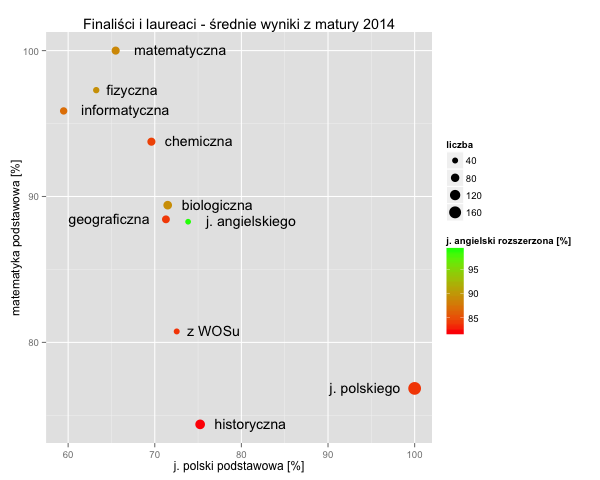

In [73]:
%%R -i srednie_laureatow_proc -w 600
library(dplyr)
library(ggplot2)

# hack, bo inaczej cos nie tak z konwersja
srednie_laureatow_proc[] <- lapply(srednie_laureatow_proc, function(x) {attr(x, 'dim') <- NULL; x})


#srednie_laureatow_proc$laureat <- rownames(srednie_laureatow_proc) %>% gsub("_laureat", "", .) %>% gsub("_", " ", .)

# srednie_laureatow_proc <- filter(srednie_laureatow_proc, laureat != "srednia")

z <- c("geograficzna", "j. polskiego")

ggplot(srednie_laureatow_proc, aes(x=j_polski_podstawowa, y=matematyka_podstawowa,
                                   label=olimpiada)) +
  geom_point(aes(size=liczba, color=j_angielski_rozszerzona)) +  # j_angielski_podstawowa
  scale_size_area() +
  scale_colour_gradient("j. angielski rozszerzona [%]", low="red", high="green") + 
  geom_text(hjust=1.2, vjust=0.4, data=filter(srednie_laureatow_proc, olimpiada %in% z)) +
  geom_text(hjust=-0.2, vjust=0.4, data=filter(srednie_laureatow_proc, !(olimpiada %in% z))) +
 #  stat_smooth(method="lm", se=F, data=filter(srednie_laureatow_proc, !(olimpiada %in% c("matematyczna", "j. polskiego")))) +
  ggtitle("Finaliści i laureaci - średnie wyniki z matury 2014") +
  labs(x="j. polski podstawowa [%]", y="matematyka podstawowa [%]")

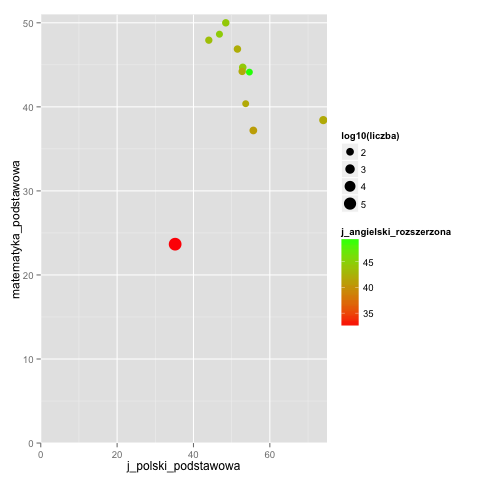

In [100]:
%%R -i srednie_laureatow
library(dplyr)
library(ggplot2)

# hack, bo inaczej cos nie tak z konwersja
srednie_laureatow[] <- lapply(srednie_laureatow, function(x) {attr(x, 'dim') <- NULL; x})

srednie_laureatow$laureat <- rownames(srednie_laureatow) %>% gsub("_laureat", "", .) %>% gsub("_", " ", .)

ggplot(srednie_laureatow, aes(x=j_polski_podstawowa, y=matematyka_podstawowa,
                              label=laureat)) +
  geom_point(aes(size=log10(liczba), color=j_angielski_rozszerzona)) +  # j_angielski_podstawowa
  scale_size_area(max_size=6) +
  scale_colour_gradient(low="red", high="green") +
  coord_cartesian(xlim=c(0, 75), ylim=c(0, 51)) 

In [52]:
# Jezdem laureatem z informatyki

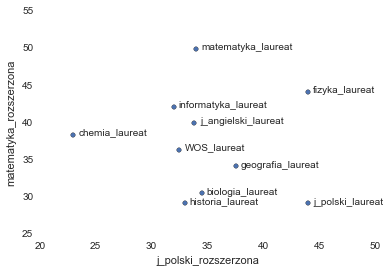

In [22]:
srednie_laureatow.plot(x='j_polski_rozszerzona', y='matematyka_rozszerzona', kind='scatter')
for k, v in srednie_laureatow.iterrows():
    plt.text(v['j_polski_rozszerzona'] + 0.5, v['matematyka_rozszerzona'] - 0.2, k)

In [23]:
zlicenia_laureatow[['j_polski_podstawowa', 'matematyka_podstawowa', 'j_polski_rozszerzona', 'matematyka_rozszerzona']]

,j_polski_podstawowa,matematyka_podstawowa,j_polski_rozszerzona,matematyka_rozszerzona
biologia_laureat,84,84,2,14
chemia_laureat,74,74,1,45
fizyka_laureat,45,45,1,45
geografia_laureat,69,69,9,51
historia_laureat,105,105,65,18
informatyka_laureat,61,59,1,60
j_angielski_laureat,37,37,16,20
j_polski_laureat,183,182,183,26
matematyka_laureat,74,67,2,74
WOS_laureat,40,40,19,13


In [ ]:
# wysokie wyniki z powodu niskiej statystyki